# Class 4: Dates and time series analysis

## Dates and time series analysis

From [Wikipedia](https://en.wikipedia.org/wiki/Time_series):

> A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data.

What are time series you've seen / worked with?

Is the 311 data a time series?

As an example, we'll look at the frequency of 311 requests:

- Over time
- By day of the week
- By hour

## Importing necessary packages

In [1]:
import pandas as pd
import plotly.express as px

### Data preparation

Load 311 data.

In [3]:
requests = pd.read_csv(
    "https://storage.googleapis.com/python-public-policy2/data/311_requests_2018-19_sample_clean.csv.zip"
)

/var/folders/kr/nx0m1j811kz5vy8c87ffchzr0000gn/T/ipykernel_14189/461306798.py:1: DtypeWarning:

Columns (8,20,31,34) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
requests[["Created Date", "Closed Date"]]

,Created Date,Closed Date
0,08/01/2018 12:05:13 AM,08/01/2018 12:05:13 AM
1,08/01/2018 12:06:05 AM,08/01/2018 12:06:05 AM
2,08/01/2018 12:06:16 AM,08/03/2018 02:03:55 PM
3,08/01/2018 12:06:29 AM,08/01/2018 02:54:24 AM
4,08/01/2018 12:06:51 AM,08/01/2018 04:54:26 AM
...,...,...
499953,08/24/2019 01:46:09 AM,NaN
499954,08/24/2019 01:49:49 AM,NaN
499955,08/24/2019 01:56:35 AM,NaN
499956,08/24/2019 01:56:40 AM,NaN


Get the minimum and maximum Created Date:

In [5]:
requests["Created Date"].min()

'01/01/2019 01:00:00 PM'

In [6]:
requests["Created Date"].max()

'12/31/2018 12:59:37 AM'

Anything you notice about that?

The dates are stored as strings (`object`s):

In [7]:
requests.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

## Convert columns to timestamps using [pandas' `to_datetime()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

In [8]:
requests["Created Date"] = pd.to_datetime(requests["Created Date"], format="%m/%d/%Y %I:%M:%S %p")
requests["Closed Date"] = pd.to_datetime(requests["Closed Date"], format="%m/%d/%Y %I:%M:%S %p")

In [9]:
requests[["Created Date", "Closed Date"]]

,Created Date,Closed Date
0,2018-08-01 00:05:13,2018-08-01 00:05:13
1,2018-08-01 00:06:05,2018-08-01 00:06:05
2,2018-08-01 00:06:16,2018-08-03 14:03:55
3,2018-08-01 00:06:29,2018-08-01 02:54:24
4,2018-08-01 00:06:51,2018-08-01 04:54:26
...,...,...
499953,2019-08-24 01:46:09,NaT
499954,2019-08-24 01:49:49,NaT
499955,2019-08-24 01:56:35,NaT
499956,2019-08-24 01:56:40,NaT


[More about the `format` string.](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes) If you don't provide one, it will take much longer to convert.

Check data types and confirm they are now datetime:

In [10]:
requests.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                              object
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status                                    object
Due Date            

In [11]:
requests["Created Date"].min()

Timestamp('2018-08-01 00:05:13')

In [12]:
requests["Created Date"].max()

Timestamp('2019-08-24 01:57:58')

## In-class exercise

Let's do up through Step 2 of [Homework 4](https://python-public-policy.afeld.me/en/columbia/hw_4.html).

## Noise complaints per day

In [13]:
noise = requests[requests["Complaint Type"] == "Noise - Residential"]
noise_per_day = noise.resample("D", on="Created Date").size().reset_index(name="count_requests")

noise_per_day

,Created Date,count_requests
0,2018-08-01,50
1,2018-08-02,49
2,2018-08-03,65
3,2018-08-04,162
4,2018-08-05,191
...,...,...
384,2019-08-20,60
385,2019-08-21,46
386,2019-08-22,62
387,2019-08-23,109


### [Resampling](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/09_timeseries.html#resample-a-time-series-to-another-frequency)

Once you have a column with datetime objects, pandas can manipulate them directly. From [the User Guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling):

> `resample()` is a time-based `groupby`

```python
.resample('D', on='Created Date')
```

The `'D'` is the [offset alias](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases), i.e. the desired frequency.

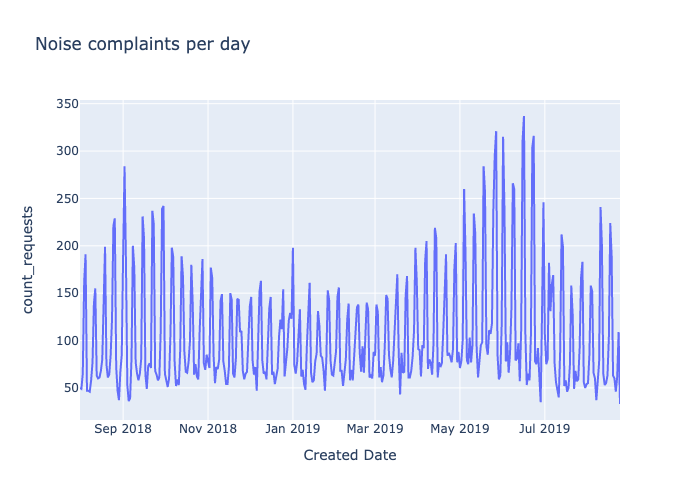

In [14]:
fig = px.line(
    noise_per_day,
    x="Created Date",
    y="count_requests",
    title="Noise complaints per day",
)
fig.show()

How about a rolling average?

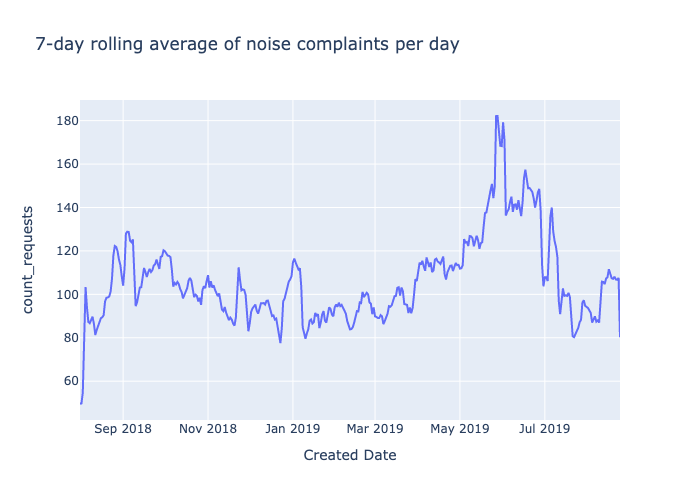

In [15]:
noise_per_day_rolling = noise_per_day.rolling("7D", on="Created Date").mean()

fig = px.line(
    noise_per_day_rolling,
    x="Created Date",
    y="count_requests",
    title="7-day rolling average of noise complaints per day",
)
fig.show()

Let's try weekly:

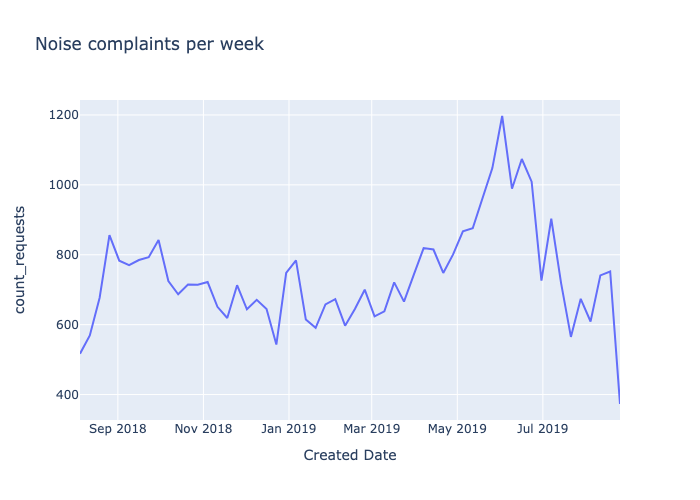

In [16]:
noise_per_week = noise.resample("W", on="Created Date").size().reset_index(name="count_requests")

fig = px.line(
    noise_per_week,
    x="Created Date",
    y="count_requests",
    title="Noise complaints per week",
)
fig.show()

## Resampling with other grouping

In [17]:
noise.resample("W", on="Created Date").size()

# can be rewrritten as

noise.groupby([pd.Grouper(key="Created Date", freq="W")]).size()

Created Date
2018-08-05     517
2018-08-12     569
2018-08-19     677
2018-08-26     856
2018-09-02     783
2018-09-09     770
2018-09-16     785
2018-09-23     793
2018-09-30     842
2018-10-07     725
2018-10-14     687
2018-10-21     715
2018-10-28     714
2018-11-04     722
2018-11-11     651
2018-11-18     619
2018-11-25     713
2018-12-02     644
2018-12-09     671
2018-12-16     645
2018-12-23     543
2018-12-30     748
2019-01-06     784
2019-01-13     615
2019-01-20     591
2019-01-27     658
2019-02-03     673
2019-02-10     597
2019-02-17     645
2019-02-24     700
2019-03-03     624
2019-03-10     638
2019-03-17     721
2019-03-24     666
2019-03-31     743
2019-04-07     819
2019-04-14     815
2019-04-21     748
2019-04-28     801
2019-05-05     867
2019-05-12     876
2019-05-19     962
2019-05-26    1048
2019-06-02    1197
2019-06-09     989
2019-06-16    1074
2019-06-23    1009
2019-06-30     726
2019-07-07     903
2019-07-14     719
2019-07-21     565
2019-07-28     674

This means you can add other columns to group by:

In [18]:
noise.groupby([pd.Grouper(key="Created Date", freq="W"), "Borough"]).size()

Created Date  Borough      
2018-08-05    BRONX            134
              BROOKLYN         157
              MANHATTAN         90
              QUEENS           112
              STATEN ISLAND     23
                              ... 
2019-08-25    BROOKLYN         126
              MANHATTAN         69
              QUEENS            75
              STATEN ISLAND     16
              Unspecified        2
Length: 310, dtype: int64

## In-class exercise

Let's do up through Step 5 of [Homework 4](https://python-public-policy.afeld.me/en/columbia/hw_4.html).

## Does the frequency of noise complaints vary by day of the week?

### Get the day of the week for each 311 request

Add column using the [time/date component](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components).

In [19]:
noise_per_day["weekday_name"] = noise_per_day["Created Date"].dt.day_name()
noise_per_day["weekday"] = noise_per_day["Created Date"].dt.weekday

noise_per_day[["Created Date", "weekday_name", "weekday"]]

,Created Date,weekday_name,weekday
0,2018-08-01,Wednesday,2
1,2018-08-02,Thursday,3
2,2018-08-03,Friday,4
3,2018-08-04,Saturday,5
4,2018-08-05,Sunday,6
...,...,...,...
384,2019-08-20,Tuesday,1
385,2019-08-21,Wednesday,2
386,2019-08-22,Thursday,3
387,2019-08-23,Friday,4


### Find the median count of 311 requests per weekday

In [20]:
# having the (numeric) `weekday` first ensures they're in order
columns = ["weekday", "weekday_name"]
noise_weekday = (
    noise_per_day.groupby(columns)["count_requests"].median().reset_index(name="median_requests")
)

noise_weekday

,weekday,weekday_name,median_requests
0,0,Monday,76.0
1,1,Tuesday,65.0
2,2,Wednesday,62.0
3,3,Thursday,66.0
4,4,Friday,93.0
5,5,Saturday,160.5
6,6,Sunday,170.0


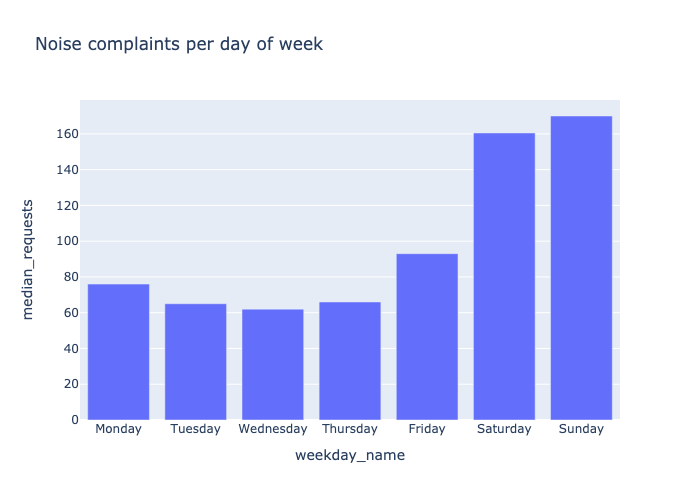

In [21]:
fig = px.bar(
    noise_weekday,
    x="weekday_name",
    y="median_requests",
    title="Noise complaints per day of week",
)
fig.show()

## What about by time of day?

Get count of noise complaints per individual date and hour:

In [22]:
noise_per_date_hour = (
    noise.resample("H", on="Created Date").size().reset_index(name="count_requests")
)

# create a column for the hour number, so we can group on it
noise_per_date_hour["hour"] = noise_per_date_hour["Created Date"].dt.hour

noise_per_date_hour

,Created Date,count_requests,hour
0,2018-08-01 00:00:00,6,0
1,2018-08-01 01:00:00,3,1
2,2018-08-01 02:00:00,4,2
3,2018-08-01 03:00:00,1,3
4,2018-08-01 04:00:00,0,4
...,...,...,...
9309,2019-08-23 21:00:00,10,21
9310,2019-08-23 22:00:00,24,22
9311,2019-08-23 23:00:00,20,23
9312,2019-08-24 00:00:00,18,0


Get the median count of complaints per hour:

In [23]:
noise_hour = (
    noise_per_date_hour.groupby("hour")["count_requests"]
    .median()
    .reset_index(name="median_requests")
)
noise_hour

,hour,median_requests
0,0,7.0
1,1,5.0
2,2,3.0
3,3,2.0
4,4,1.0
5,5,1.0
6,6,1.0
7,7,1.0
8,8,1.0
9,9,1.0


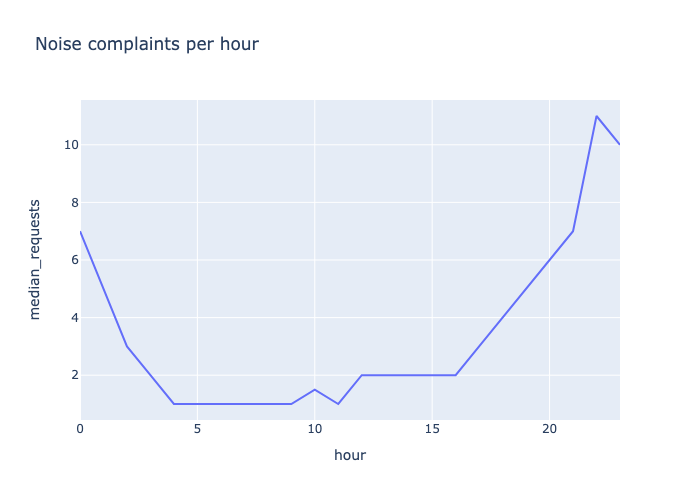

In [24]:
fig = px.line(noise_hour, x="hour", y="median_requests", title="Noise complaints per hour")
fig.show()

## Resampling vs. time/date components

- Use resampling when you want to work with dates as continuous values, e.g. points in time
- Use date components when you want to work with dates as categorical values, e.g. month number, day of week

## Which 311 complaints take the longest to resolve?

In [25]:
# calculate the amount of time that passed between Created Date and Closed Date

requests["resolution_duration"] = requests["Closed Date"] - requests["Created Date"]

# print head to check results

requests[["Closed Date", "Created Date", "resolution_duration"]].head()

,Closed Date,Created Date,resolution_duration
0,2018-08-01 00:05:13,2018-08-01 00:05:13,0 days 00:00:00
1,2018-08-01 00:06:05,2018-08-01 00:06:05,0 days 00:00:00
2,2018-08-03 14:03:55,2018-08-01 00:06:16,2 days 13:57:39
3,2018-08-01 02:54:24,2018-08-01 00:06:29,0 days 02:47:55
4,2018-08-01 04:54:26,2018-08-01 00:06:51,0 days 04:47:35


In [26]:
requests.dtypes

Unique Key                                  int64
Created Date                       datetime64[ns]
Closed Date                        datetime64[ns]
Agency                                     object
Agency Name                                object
Complaint Type                             object
Descriptor                                 object
Location Type                              object
Incident Zip                               object
Incident Address                           object
Street Name                                object
Cross Street 1                             object
Cross Street 2                             object
Intersection Street 1                      object
Intersection Street 2                      object
Address Type                               object
City                                       object
Landmark                                   object
Facility Type                              object
Status                                     object


In [27]:
requests["resolution_duration"].median()

Timedelta('1 days 05:19:58')

Ignore empty values:

In [28]:
df_clean = requests.dropna(subset=["resolution_duration"])
median_durations = df_clean.groupby("Complaint Type")["resolution_duration"].median()

median_durations.nlargest(15).reset_index(name="median_duration")

,Complaint Type,median_duration
0,For Hire Vehicle Complaint,98 days 15:08:41
1,Taxi Complaint,98 days 09:37:53
2,Graffiti,89 days 11:29:38
3,New Tree Request,83 days 16:56:30
4,Food Establishment,60 days 15:45:06
5,Facades,55 days 21:04:26
6,Sustainability Enforcement,47 days 12:47:23
7,Radioactive Material,46 days 01:01:18
8,Drinking Water,35 days 00:24:20
9,Bike Rack Condition,33 days 22:22:32


In [29]:
median_durations.nsmallest(15).reset_index(name="median_duration")

,Complaint Type,median_duration
0,BEST/Site Safety,0 days 00:00:00
1,Construction Safety Enforcement,0 days 00:00:00
2,Derelict Vehicles,0 days 00:00:00
3,Miscellaneous Categories,0 days 00:00:00
4,Quality of Life,0 days 00:00:00
5,Street Light Condition,0 days 00:00:00
6,Taxi Report,0 days 00:00:34
7,Benefit Card Replacement,0 days 00:00:39
8,For Hire Vehicle Report,0 days 00:00:42
9,Advocate-Personal Exemptions,0 days 00:05:39


## [Filtering timestamps](https://www.geeksforgeeks.org/select-pandas-dataframe-rows-between-two-dates/)

Noise complaints over New Year's.

In [30]:
after_dec_31 = requests["Created Date"] >= "2018-12-31"
before_jan_2 = requests["Created Date"] < "2019-01-02"
residential_only = requests["Complaint Type"] == "Noise - Residential"

display_columns = ["Created Date", "Complaint Type"]
requests[after_dec_31 & before_jan_2 & residential_only][display_columns]

,Created Date,Complaint Type
201471,2018-12-31 00:03:37,Noise - Residential
201473,2018-12-31 00:05:12,Noise - Residential
201475,2018-12-31 00:07:00,Noise - Residential
201478,2018-12-31 00:11:18,Noise - Residential
201481,2018-12-31 00:19:44,Noise - Residential
...,...,...
203413,2019-01-01 22:59:22,Noise - Residential
203415,2019-01-01 23:03:03,Noise - Residential
203416,2019-01-01 23:04:27,Noise - Residential
203420,2019-01-01 23:10:46,Noise - Residential


## Conditionals review

_If there's time_

### Pure ("Purr") Python

**Example:** Make a function that checks if the given name is one of my cats

In [31]:
# name = input("Name: ")
name = "Wilbur"

In [32]:
def test_cats(word):
    print(word)

    if word.lower() == "blondie" or word.lower() == "wilbur":
        return True
    elif otherthing:
        stuff
    else:
        return False

    # versus

    if word.lower() == "blondie" or word.lower() == "wilbur":
        something
    if otherthing:
        stuff


test_cats(name)

Wilbur


True

In [33]:
False or name

'Wilbur'

In [34]:
name == ("blondie" or "wilbur")

False

In [35]:
"blondie" or "wilbur"

'blondie'

### Pandas

[Comparison operators](https://pandas.pydata.org/docs/user_guide/indexing.html#boolean-indexing)\* are different, since you're working with full columns instead of single values.

_\*You may see these referred to as "bitwise operators", though that name isn't quite accurate._

[Another sample dataset from Plotly:](https://plotly.com/python-api-reference/generated/plotly.data.html#plotly.data.medals_wide)

In [36]:
import plotly

medals = plotly.data.medals_wide()
medals

,nation,gold,silver,bronze
0,South Korea,24,13,11
1,China,10,15,8
2,Canada,9,12,12


In [37]:
medals["gold"] >= 10

0     True
1     True
2    False
Name: gold, dtype: bool

In [38]:
medals["silver"] >= 14

0    False
1     True
2    False
Name: silver, dtype: bool

In [39]:
(medals["gold"] >= 10) & (medals["silver"] >= 14)

0    False
1     True
2    False
dtype: bool

In [40]:
medals[(medals["gold"] >= 10) & (medals["silver"] >= 14)]

,nation,gold,silver,bronze
1,China,10,15,8


Refactored:

In [41]:
high_gold = medals["gold"] >= 10
high_silver = medals["silver"] >= 14

medals[high_gold & high_silver]

,nation,gold,silver,bronze
1,China,10,15,8


## Final Project

1. Check feedback on your proposals, even if you got 100%.
1. [Once you start](https://python-public-policy.afeld.me/en/columbia/final_project.html#once-you-start)